<a href="https://colab.research.google.com/github/vatiza/Machine_Learning/blob/main/Preprocessing_Breast_Canser_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Img Processing dataset from UCI

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
# Add columns Name
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
'Normal Nucleoli', 'Mitoses','Class']
data=data.drop(['Sample code'],axis=1)
print("Number of Samples: %d"% data.shape[0])
print("Number of Features: %d" %data.shape[1])
data

Number of Samples: 699
Number of Features:10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


**Missing Value Handleing**

In [ ]:
import numpy as np
data=data.replace('?',np.NaN)
print("Number of Missing Values:")
for col in data.columns:
print("\t%s:%d"%(col,data[col].isna().sum()))


Number of Missing Values:
	Clump Thickness:0
	Uniformity of Cell Size:0
	Uniformity of Cell Shape:0
	Marginal Adhesion:0
	Single Epithelial Cell Size:0
	Bare Nuclei:16
	Bland Chromatin:0
	Normal Nucleoli:0
	Mitoses:0
	Class:0


**Missing value handleing with medin value**

In [ ]:
# data2 is temp
data2=data["Bare Nuclei"]
print("Before replacing missing value")
print(data2[20:25])
data2=data2.fillna(data2.median())
print("\nAfter replacing missing value")
print(data2[20:25])

Before replacing missing value
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing value
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


*** Outliers ***

In [ ]:
data["Bare Nuclei"]

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

** BoxPlot **

<Axes: >

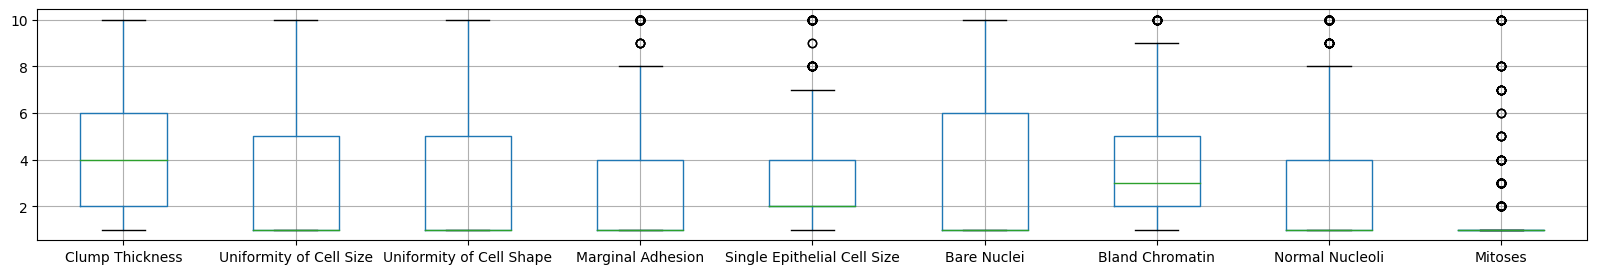

In [ ]:
data2=data.drop(["Class"],axis=1)
data2["Bare Nuclei"]=pd.to_numeric(data2["Bare Nuclei"])
data2.boxplot(figsize=(20,3))

In [ ]:
Z=(data2-data2.mean())/data2.std()
Z[180:220]
Z.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.771569,-0.179534,-0.283909,-0.343666
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.423907,-0.179534,-0.611387,-0.343666
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.124962,-0.179534,1.353485,-0.343666
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [ ]:
# Z2 is temp
print ("Number of rows before discarding outlier =%d"% (Z.shape[0]))
Z2=Z.loc[((Z>-3).sum(axis=1)==9) & ((Z<=3).sum(axis=1)==9),:]
print("Number of rows after discarding Outlier= %d"%(Z2.shape[0]))

Number of rows before discarding outlier =699
Number of rows after discarding Outlier= 632




 how top duplicate functhion use and remove doupca te data and its find to

** Duplicate Data**

In [ ]:
dups=data.duplicated()
print("Number of duplicate rows=%d"%(dups.sum()))
data.loc[[11,28]]

Number of duplicate rows=236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [ ]:
print("Number of rows before drop duplicate data %d"% (data.shape[0]))
data2=data.drop_duplicates()
print("Number of rows after drop duplicate data %d"% (data2.shape[0]))

Number of rows before drop duplicate data 699
Number of rows after drop duplicate data 463


## **Aggregation**
### Data aggregation is a preporocessing task where the values of tow or more objects are combined into a single onject. n the example below, we willl use the daily precipitaion time series data for a weather station located at detroit metro ariport. The raw data was obtained  from the Climate Data Online website `***ncdc.noaa.gov.***`
The daily preciptaion time serties will be compared against its monthly values.


In [ ]:
from google.colab import drive
